<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [279]:
%matplotlib inline

import sys
from collections import defaultdict
import matplotlib.pyplot as plt

In [280]:
class Layer:
    
    def __init__(self, s):
        self.depth, self.range = [int(_) for _ in s.split(': ', 1)]
        self.forward = True
        self.scanner = 0
        
    def __repr__(self):
        return 'Layer(depth={}, range={}, scanner={})'.format(
            self.depth,
            self.range,
            self.scanner,
            )
    
    def tick(self):
        if self.forward:
            new_value = self.scanner + 1
            if new_value >= self.range:
                self.forward = not self.forward
                new_value = self.scanner - 1
        else:
            new_value = self.scanner - 1
            if new_value < 0:
                self.forward = not self.forward
                new_value = self.scanner + 1 
        self.scanner = new_value
    
# test
l0 = Layer('0: 3')
assert l0.depth == 0
assert l0.range == 3
assert l0.forward == True
l1 = Layer('1: 2')
assert l1.depth == 1
assert l1.range == 2
# test tick 

l0 = Layer('0: 3')
assert l0.forward == True
assert l0.scanner == 0
l0.tick()
assert l0.forward == True
assert l0.scanner == 1
l0.tick()
assert l0.forward == True
assert l0.scanner == 2
l0.tick()
assert l0.forward == False
assert l0.scanner == 1
l0.tick()
assert l0.forward == False
assert l0.scanner == 0
l0.tick()
assert l0.forward == True
assert l0.scanner == 1

In [281]:

class Firewall:
    
    def __init__(self):
        self.kernel = defaultdict(bool)
        self.max_depth = 0
        self.max_range = 0
        self._clock = 0
        
    def add(self, layer):
        self.kernel[layer.depth] = layer
        self.max_depth = max(self.max_depth, layer.depth)
        self.max_range = max(self.max_range, layer.range)
        
    def __iter__(self):
        return (self.kernel[k] for k in self.kernel if self.kernel[k])
        
    def tick(self):
        self._clock += 1
        for layer in self:
            layer.tick()                
        
    def delay(self, n):
        for _ in range(n):
            self.tick()
        
    def __str__(self):
        buff = []
        buff.append('Picosecond {}:\n'.format(self._clock))
        for d in range(self.max_depth+1):
            buff.append('{:^5}'.format(d))
        buff.append('\n')
        for r in range(self.max_range+1):
            for d in range(self.max_depth+1):
                layer = self.kernel[d]
                if layer:
                    if layer.range > r:
                        if layer.scanner == r:
                            buff.append(' [S] ')
                        else:
                            buff.append(' [ ] ')
                    else:
                        buff.append('     ')
                elif r == 0:
                    buff.append(' ... ')
                else:
                    buff.append('     ')
            buff.append('\n')
        return ''.join(buff)
        

In [282]:
def load_firewall(filename, max_lines=0):
    firewall = Firewall()
    nl = 0
    with open(filename, 'r') as f:
        for nl, l in enumerate(f):
            firewall.add(Layer(l.strip()))        
            if nl == max_lines - 1:
                break
    return firewall

In [286]:
firewall = load_firewall('input_test.txt')
assert firewall.max_depth == 6
assert firewall.max_range == 4

for _ in range(5):
    print(firewall)
    firewall.tick()


Picosecond 0:
  0    1    2    3    4    5    6  
 [S]  [S]  ...  ...  [S]  ...  [S] 
 [ ]  [ ]            [ ]       [ ] 
 [ ]                 [ ]       [ ] 
                     [ ]       [ ] 
                                   

Picosecond 1:
  0    1    2    3    4    5    6  
 [ ]  [ ]  ...  ...  [ ]  ...  [ ] 
 [S]  [S]            [S]       [S] 
 [ ]                 [ ]       [ ] 
                     [ ]       [ ] 
                                   

Picosecond 2:
  0    1    2    3    4    5    6  
 [ ]  [S]  ...  ...  [ ]  ...  [ ] 
 [ ]  [ ]            [ ]       [ ] 
 [S]                 [S]       [S] 
                     [ ]       [ ] 
                                   

Picosecond 3:
  0    1    2    3    4    5    6  
 [ ]  [ ]  ...  ...  [ ]  ...  [ ] 
 [S]  [S]            [ ]       [ ] 
 [ ]                 [ ]       [ ] 
                     [S]       [S] 
                                   

Picosecond 4:
  0    1    2    3    4    5    6  
 [S]  [S]  ...  ...  [ ]  

In [287]:
for layer in firewall: print(layer)

Layer(depth=0, range=3, scanner=1)
Layer(depth=1, range=2, scanner=1)
Layer(depth=4, range=4, scanner=1)
Layer(depth=6, range=4, scanner=1)


In [288]:
def go(firewall):
    hits = 0
    severity = 0
    for player in range(0, firewall.max_depth+1):    
        layer = firewall.kernel[player]
        # print('Player:', player, 'layer', layer, end=' ')
        if layer and layer.scanner == 0:
            # print('[hit]')
            hits += 1
            severity += layer.depth * layer.range
        # else:
            # print('[Ok]')
        firewall.tick()
    return(hits, severity)
    
firewall = load_firewall('input.txt')
hits, severity = go(firewall)
print('hits:', hits)
print('severity:', severity)

hits: 6
severity: 1476


In [6]:
## Part 2

In [289]:
# test

firewall = load_firewall('input_test.txt')
firewall.delay(10)
hits, severity = go(firewall)
assert hits == 0
assert severity == 0

In [276]:
# More depth on the firewall, less possible solutions

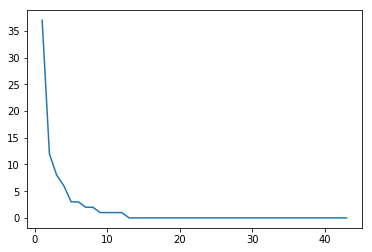

In [277]:
x = []
y = []
for num_lineas in range(1, 44):
    x.append(num_lineas)
    sols = 0
    for i in range(50):
        firewall = load_firewall('input.txt', max_lines=num_lineas)
        firewall.delay(i)
        hits, severity = go(firewall)
        if hits == 0:
            sols += 1
    y.append(sols)
plt.plot(x, y);

In [290]:
# Quick test, if it doesn't wotk, exit ASAP

def tryit(firewall):
    for player in range(0, firewall.max_depth+1):    
        layer = firewall.kernel[player]
        if layer and layer.scanner == 0:
            return False
        firewall.tick()
    return True

firewall = load_firewall('input_test.txt')
firewall.delay(10)
assert tryit(firewall) == True

In [295]:
for delay in range(0, 50):
    f = Firewall()
    f.add(Layer('6: 5'))
    f.delay(delay)
    success = tryit(f)
    if not success:
        print(delay, 'x')

2 x
10 x
18 x
26 x
34 x
42 x


### What this means?

- rule 6:5 means all solution on the form $2 + 8x$ will fail,

$$ \forall n \to n\ mod\ 8 = 2 \implies n \notin {solutions} $$

- rule 16:8 means all solution on the form 12 + 14n will fail

$$ \forall n \to n\ mod\ 14 = 12 \implies n \notin {solutions} $$

etc...

In [297]:
def chk(t):
    return not any([
        t % 4 == 0,  # rule 0
        t % 2 == 1,  # rule 1
        t % 6 == 4, 
        t % 10 == 6,
        t % 8 == 2,
        t % 10 == 2,  # rule 5
        t % 10 == 0,
        t % 6 == 0,
        t % 14 == 0,
        t % 14 == 12,
        t % 16 == 14,  # rule 10
        t % 14 == 8,
        t % 10 == 8,
        t % 26 == 2,
        t % 22 == 18,
        t % 18 == 8,  # rule 15
        t % 22 == 14,
        t % 14 == 10,
        t % 18 == 2,
        t % 14 == 6,
        t % 14 == 4,  # rule 20
        t % 22 == 4,
        t % 22 == 2,
        t % 22 == 0,
        t % 22 == 20,
        t % 26 == 4,  # rule 25
        t % 26 == 0,
        t % 22 == 12,
        t % 22 == 10,
        t % 22 == 8,
        t % 22 == 6, # rule 30
        t % 26 == 16,
        t % 26 == 14,
        t % 26 == 12,
        t % 26 == 10,
        t % 26 == 8,  # rule 35
        t % 26 == 6,
        t % 34 == 22,
        t % 26 == 22,
        t % 38 == 30,
        t % 26 == 18,  # rule 40
        t % 32 == 6,
        t % 38 == 18,
        t % 46 == 40,
     ])

sol = 0
found = chk(sol)
counter = 0
while not found:
    counter += 1
    if counter % 25000 == 0:
        sys.stdout.write('#')
        sys.stdout.flush()
    sol += 1
    found = chk(sol)
    if found:
        print('\nEncontrado:', sol)
        break
    if counter > 999999999999:
        break
else:
    print('Nope')

#############################################################################################################################################################
Encontrado: 3937334


In [298]:
firewall = load_firewall('input.txt')
firewall.delay(sol)
print(sol, tryit(firewall))

3937334 True


In [258]:
%%timeit
firewall = load_firewall('input.txt')
time firewall.delay(3937334)
print(sol, go(firewall))

CPU times: user 1min 4s, sys: 0 ns, total: 1min 4s
Wall time: 1min 4s


(0, 0)